<a href="https://colab.research.google.com/github/dbr-ufs/solar_fotovoltaica/blob/master/5_Posicionamento_do_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Posicionamento do Sol

Esse material é baseado no código ``solarposition.py``

Link do Principal Algoritmo: https://midcdmz.nrel.gov/spa/

## Ajuste da nossa máquina Jupyter

In [ ]:
import datetime

# scientific python add-ons
import numpy as np
import pandas as pd

# plotting stuff
# first line makes the plots appear in the notebook
%matplotlib inline 
import matplotlib.pyplot as plt

# finally, we import the pvlib library

In [ ]:
try:
  import pvlib
except ImportError:
  !pip install pvlib
  import pvlib
  
from pvlib.location import Location

Código Fonte: https://pvlib-python.readthedocs.io/en/stable/_modules/pvlib/solarposition.html

Principal Comando: https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.solarposition.get_solarposition.html

## Algoritmo de Localização Aparente do Sol

### Localização

Exemplos de cidades para os cálculos.

In [ ]:
aju = Location(-10.9095, -37.0748, 'America/Bahia', 0, 'Aracaju')
print(aju)
tus = Location(32.2, -111, 'US/Arizona', 700, 'Tucson')
print(tus)
golden = Location(39.742476, -105.1786, 'America/Denver', 1830, 'Golden')
print(golden)
golden_mst = Location(39.742476, -105.1786, 'MST', 1830, 'Golden MST')
print(golden_mst)
berlin = Location(52.5167, 13.3833, 'Europe/Berlin', 34, 'Berlin')
print(berlin)

Escolhendo Aracaju como a localização.

In [ ]:
loc = aju

### Quando

Definindo quando mostrar. No caso se escolheu para mostrar ontem e hoje.

In [ ]:
times = pd.date_range(start=datetime.date.today()+datetime.timedelta(-1), end=datetime.date.today(), freq='1Min')
times_loc = times.tz_localize(loc.pytz)

### Ângulos

Verifique alguns ângulos usados na astronomia.

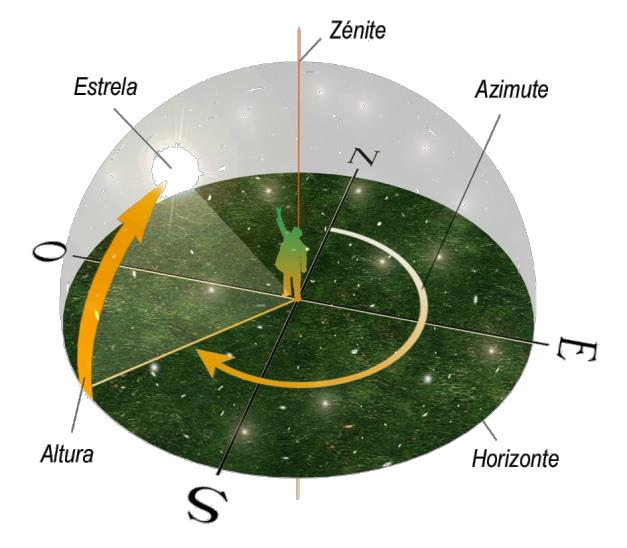

onde a altura é o ângulo formado entre o horizonte e a posição aparente do sol, o ângulo zenital é o complemento (90 - altura) e o azimute é o ângulo entre o Norte e a projeção do Sol no horizonte, girando no sentido horário.

pyephem
                           apparent_elevation  ...      zenith
2020-09-07 00:00:00-03:00          -80.286367  ...  170.286367
2020-09-07 00:01:00-03:00          -80.073183  ...  170.073183
2020-09-07 00:02:00-03:00          -79.858449  ...  169.858449
2020-09-07 00:03:00-03:00          -79.642267  ...  169.642267
2020-09-07 00:04:00-03:00          -79.424725  ...  169.424725

[5 rows x 6 columns]
spa
                           apparent_zenith  ...  equation_of_time
2020-09-07 00:00:00-03:00       170.286418  ...          2.031133
2020-09-07 00:01:00-03:00       170.073233  ...          2.031371
2020-09-07 00:02:00-03:00       169.858501  ...          2.031610
2020-09-07 00:03:00-03:00       169.642319  ...          2.031848
2020-09-07 00:04:00-03:00       169.424776  ...          2.032087

[5 rows x 6 columns]


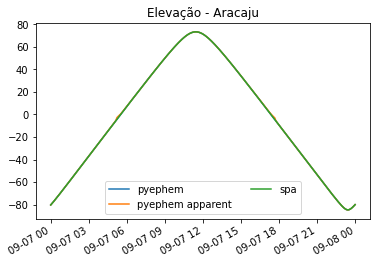

In [ ]:
pyephemout = pvlib.solarposition.pyephem(times.tz_localize(loc.tz), loc.latitude, loc.longitude)
spaout = pvlib.solarposition.spa_python(times.tz_localize(loc.tz), loc.latitude, loc.longitude)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
spaout['elevation'].plot(label='spa')
plt.legend(ncol=2)
plt.title('Altura - '+loc.name)

print('pyephem')
print(pyephemout.head())
print('spa')
print(spaout.head())

Text(0.5, 1.0, 'Azimute - Aracaju')

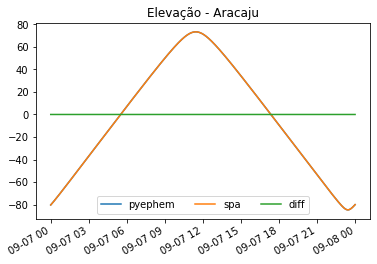

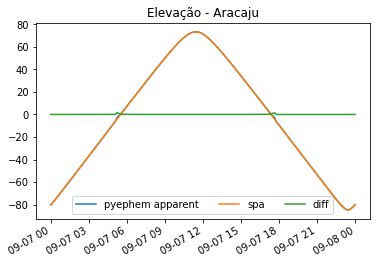

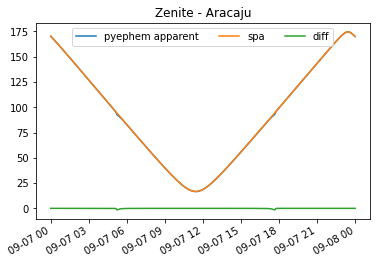

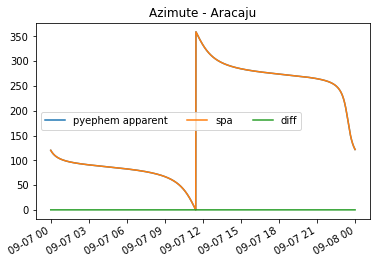

In [ ]:
plt.figure()
pyephemout['elevation'].plot(label='pyephem')
spaout['elevation'].plot(label='spa')
(pyephemout['elevation'] - spaout['elevation']).plot(label='diff')
plt.legend(ncol=3)
plt.title('Altura - '+loc.name)

plt.figure()
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
spaout['elevation'].plot(label='spa')
(pyephemout['apparent_elevation'] - spaout['elevation']).plot(label='diff')
plt.legend(ncol=3)
plt.title('Altura Aparente - '+loc.name)

plt.figure()
pyephemout['apparent_zenith'].plot(label='pyephem apparent')
spaout['zenith'].plot(label='spa')
(pyephemout['apparent_zenith'] - spaout['zenith']).plot(label='diff')
plt.legend(ncol=3)
plt.title('Zênite - '+loc.name)

plt.figure()
pyephemout['apparent_azimuth'].plot(label='pyephem apparent')
spaout['azimuth'].plot(label='spa')
(pyephemout['apparent_azimuth'] - spaout['azimuth']).plot(label='diff')
plt.legend(ncol=3)
plt.title('Azimute - '+loc.name)

### Comando `get_solarposition`

Mesmo comando, só mudar o method = 'nrel_numpy', 'nrel_numba', 'pyephem', 'ephemeris' ou 'nrel_c' 

                     apparent_zenith      zenith  ...     azimuth  equation_of_time
2020-09-07 00:00:00       143.509507  143.509507  ...  265.275981          1.988245
2020-09-07 00:01:00       143.754145  143.754145  ...  265.200546          1.988484
2020-09-07 00:02:00       143.998755  143.998755  ...  265.124416          1.988722
2020-09-07 00:03:00       144.243338  144.243338  ...  265.047577          1.988960
2020-09-07 00:04:00       144.487892  144.487892  ...  264.970012          1.989198

[5 rows x 6 columns]


Text(0.5, 1.0, 'Aracaju')

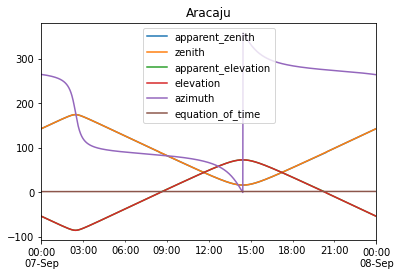

In [ ]:
solpos = pvlib.solarposition.get_solarposition(times, loc.latitude, loc.longitude,method='nrel_numpy') # 'nrel_numpy', 'nrel_numba', 'pyephem', 'ephemeris', 'nrel_c' 
print(solpos.head())
solpos.plot()
plt.title(loc.name)

### Tarefa 1


Comparar os algoritmos quanto a suas diferenças nos resultados. Observe que cada algoritmo apresenta o resultado de forma levemente diferente:

https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.solarposition.spa_python.html

https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.solarposition.pyephem.html

https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.solarposition.ephemeris.html

https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.solarposition.spa_c.html

### Tarefa 2

Sabemos que, apesar de estar no mesmo fuso horário, a posição do Sol não é a mesma em todos os locais. Mostre essa diferença, escolha dois locais dentro de um mesmo fuso horário, variando a longitude e, depois, variando a latitude e discuta os resultados. Mostre quais seriam as equações para fazer essas correções para a "hora real do Sol".

Verifique na sequência o "solar_time"

pyephem
                           apparent_elevation  ...      zenith
2020-09-07 00:00:00-03:00          -80.286367  ...  170.286367
2020-09-07 00:01:00-03:00          -80.073183  ...  170.073183
2020-09-07 00:02:00-03:00          -79.858449  ...  169.858449
2020-09-07 00:03:00-03:00          -79.642267  ...  169.642267
2020-09-07 00:04:00-03:00          -79.424725  ...  169.424725

[5 rows x 6 columns]
ephem
                           apparent_elevation  ...  solar_time
2020-09-07 00:00:00-03:00          -80.287282  ...    0.561924
2020-09-07 00:01:00-03:00          -80.074140  ...    0.578595
2020-09-07 00:02:00-03:00          -79.859449  ...    0.595266
2020-09-07 00:03:00-03:00          -79.643305  ...    0.611936
2020-09-07 00:04:00-03:00          -79.425798  ...    0.628607

[5 rows x 6 columns]


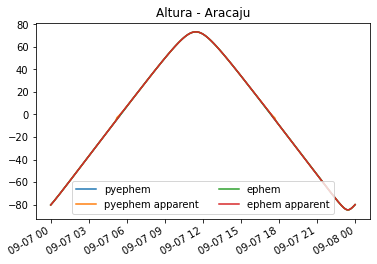

In [ ]:
pyephemout = pvlib.solarposition.pyephem(times.tz_localize(loc.tz), loc.latitude, loc.longitude)
ephemout = pvlib.solarposition.ephemeris(times.tz_localize(loc.tz), loc.latitude, loc.longitude)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
ephemout['elevation'].plot(label='ephem')
ephemout['apparent_elevation'].plot(label='ephem apparent')
plt.legend(ncol=2)
plt.title('Altura - '+loc.name)

print('pyephem')
print(pyephemout.head())
print('ephem')
print(ephemout.head())

### Tarefa 3

Explore a mudança no tempo. O que acontece nos solstícios de verão e inverno? E nos equinócios? Mostre nos calculos. 

pyephem
                           apparent_elevation  ...      zenith
2015-03-28 00:00:00+01:00          -34.669825  ...  124.669825
2015-03-28 00:05:00+01:00          -34.705895  ...  124.705895
2015-03-28 00:10:00+01:00          -34.721813  ...  124.721813
2015-03-28 00:15:00+01:00          -34.717561  ...  124.717561
2015-03-28 00:20:00+01:00          -34.693143  ...  124.693143

[5 rows x 6 columns]
ephem
                           apparent_elevation  ...  solar_time
2015-03-28 00:00:00+01:00          -34.667077  ...   23.803474
2015-03-28 00:05:00+01:00          -34.703175  ...   23.886825
2015-03-28 00:10:00+01:00          -34.719120  ...   23.970175
2015-03-28 00:15:00+01:00          -34.714893  ...    0.053526
2015-03-28 00:20:00+01:00          -34.690500  ...    0.136877

[5 rows x 6 columns]


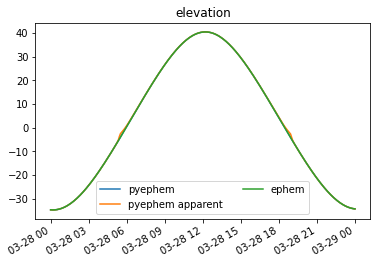

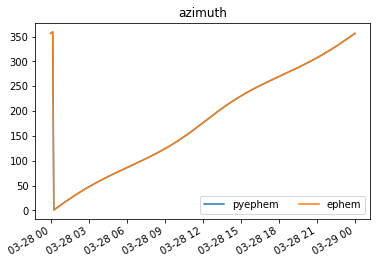

In [ ]:
times = pd.date_range(start=datetime.date(2015,3,28), end=datetime.date(2015,3,29), freq='5min') # pd.DatetimeIndex

pyephemout = pvlib.solarposition.pyephem(times.tz_localize(loc.tz), loc.latitude, loc.longitude)
ephemout = pvlib.solarposition.ephemeris(times.tz_localize(loc.tz), loc.latitude, loc.longitude)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
ephemout['elevation'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('Altura - '+loc.name)

plt.figure()
pyephemout['azimuth'].plot(label='pyephem')
ephemout['azimuth'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('Azimute - '+loc.name)

print('pyephem')
print(pyephemout.head())
print('ephem')
print(ephemout.head())

pyephem
                           apparent_elevation  ...      zenith
2015-03-30 00:00:00+02:00          -31.976429  ...  121.976429
2015-03-30 00:05:00+02:00          -32.239797  ...  122.239797
2015-03-30 00:10:00+02:00          -32.485100  ...  122.485100
2015-03-30 00:15:00+02:00          -32.712074  ...  122.712074
2015-03-30 00:20:00+02:00          -32.920477  ...  122.920477

[5 rows x 6 columns]
ephem
                           apparent_elevation  ...  solar_time
2015-03-30 00:00:00+02:00          -31.973191  ...   22.813319
2015-03-30 00:05:00+02:00          -32.236587  ...   22.896670
2015-03-30 00:10:00+02:00          -32.481918  ...   22.980021
2015-03-30 00:15:00+02:00          -32.708921  ...   23.063372
2015-03-30 00:20:00+02:00          -32.917353  ...   23.146722

[5 rows x 6 columns]


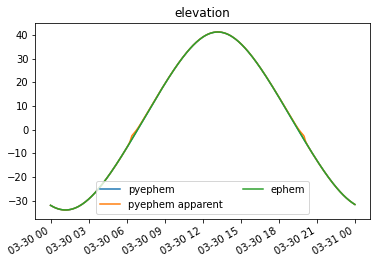

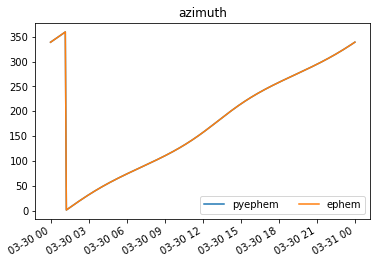

In [ ]:
times = pd.date_range(start=datetime.date(2015,3,30), end=datetime.date(2015,3,31), freq='5min')

pyephemout = pvlib.solarposition.pyephem(times.tz_localize(loc.tz), loc.latitude, loc.longitude)
ephemout = pvlib.solarposition.ephemeris(times.tz_localize(loc.tz), loc.latitude, loc.longitude)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
ephemout['elevation'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('Altura - '+loc.name)

plt.figure()
pyephemout['azimuth'].plot(label='pyephem')
ephemout['azimuth'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('Azimute - '+loc.name)

print('pyephem')
print(pyephemout.head())
print('ephem')
print(ephemout.head())

pyephem
                           apparent_elevation  ...      zenith
2015-06-28 00:00:00+02:00          -12.679250  ...  102.679250
2015-06-28 00:05:00+02:00          -12.885989  ...  102.885989
2015-06-28 00:10:00+02:00          -13.077872  ...  103.077872
2015-06-28 00:15:00+02:00          -13.254779  ...  103.254779
2015-06-28 00:20:00+02:00          -13.416591  ...  103.416591

[5 rows x 6 columns]
ephem
                           apparent_elevation  ...  solar_time
2015-06-28 00:00:00+02:00          -12.674183  ...   22.840578
2015-06-28 00:05:00+02:00          -12.880940  ...   22.923900
2015-06-28 00:10:00+02:00          -13.072843  ...   23.007221
2015-06-28 00:15:00+02:00          -13.249769  ...   23.090542
2015-06-28 00:20:00+02:00          -13.411601  ...   23.173864

[5 rows x 6 columns]


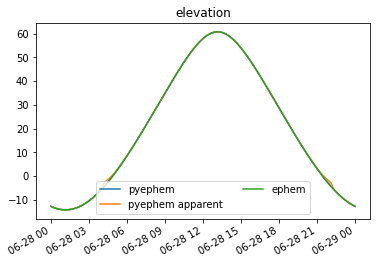

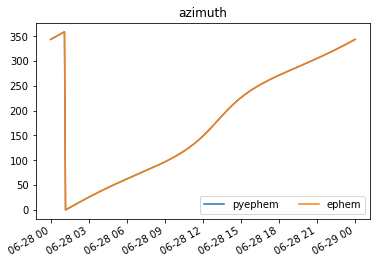

In [ ]:
times = pd.date_range(start=datetime.date(2015,6,28), end=datetime.date(2015,6,29), freq='5min')

pyephemout = pvlib.solarposition.pyephem(times.tz_localize(loc.tz), loc.latitude, loc.longitude)
ephemout = pvlib.solarposition.ephemeris(times.tz_localize(loc.tz), loc.latitude, loc.longitude)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
ephemout['elevation'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('Altura - '+loc.name)

plt.figure()
pyephemout['azimuth'].plot(label='pyephem')
ephemout['azimuth'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('Azimute - '+loc.name)

print('pyephem')
print(pyephemout.head())
print('ephem')
print(ephemout.head())

(-10.0, 10.0)

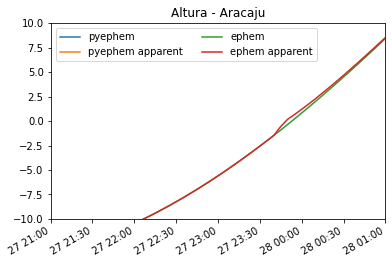

In [ ]:
pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
ephemout['elevation'].plot(label='ephem')
ephemout['apparent_elevation'].plot(label='ephem apparent')
plt.legend(ncol=2)
plt.title('Altura - '+loc.name)
plt.xlim(pd.Timestamp('2015-06-28 02:00:00+02:00'), pd.Timestamp('2015-06-28 06:00:00+02:00'))
plt.ylim(-10,10)

### Tarefa 4

Trace uma Analema. Trace um gráfico semelhante a este, mas para Aracaju:

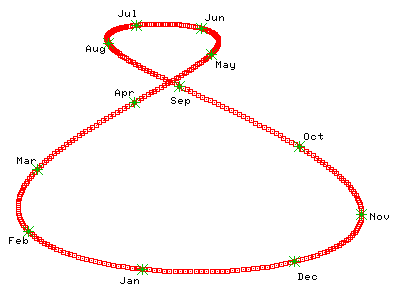

Referência: https://pt.wikipedia.org/wiki/Analema

### Tarefa 5

Implemente e plote o caminho solar em sua cidade natal.

Referência: https://pvlib-python.readthedocs.io/en/stable/auto_examples/plot_sunpath_diagrams.html

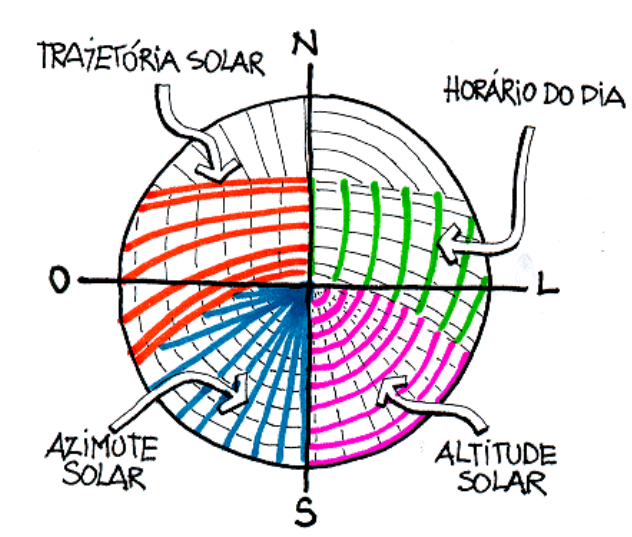

# Aprenda Mais

Simuladores Online: 
http://www.heliodon.com.br/imagens.html
